# Env

In [4]:
import numpy as np

class TwoDimArrayMap:
    def __init__(self, x_dim, y_dim, action_space_dim = 4):
        self.maze = np.zeros([x_dim, y_dim])
        self.success_reward = 0
        self.failed_reward = -1
        self.reward_states = np.full_like(np.zeros([x_dim, y_dim]), self.failed_reward)

        self.state = np.array([0, 0])
        self.observation_space_dim = x_dim * y_dim
        self.action_space_dim = action_space_dim
        self.row = len(self.maze)
        self.col = len(self.maze[0])

    def mazation(self): # random obstacles in the maze
        object_list = [0, 1]
        for i in range(1,self.row-1):
            for j in range(1,self.col-1):
                self.maze[i][j] = np.random.choice(object_list, 1, p=[0.8, 0.2])
        return self

    def SimpleAntMazation(self):   # simple maze having one large wall. Represent wall as 1. At the reward states, wall is -9
        for i in range(self.row):
            for j in range(self.col):
                if (self.row//3) <= i < (2 * self.row//3):
                    if j < self.col * (2/3):
                        self.maze[i][j] = 1
                        self.reward_states[i][j] = -9

    def reset(self):
        self.state = 0
        return self.state

    def step(self, action):
        if action == 0 and self.state % self.col != (self.col - 1) and self.state + 1 < self.observation_space_dim:     # move right
            if (self.maze[(self.state + 1) // self.row][(self.state + 1) % self.col]) == 0:
                self.state = self.state + 1
        elif action == 1 and self.state % self.col != 0 and self.state - 1 >= 0:                                        # move left
            if (self.maze[(self.state - 1) // self.row][(self.state - 1) % self.col]) == 0:
                self.state = self.state - 1
        elif action == 2 and self.state < (self.observation_space_dim - self.row):                                      # move down
            if (self.maze[(self.state + self.row) // self.row][(self.state + self.row) % self.col]) == 0:
                self.state = self.state + self.row
        elif action == 3 and self.state > (self.row - 1):                                                               # move up
            if (self.maze[(self.state - self.row) // self.row][(self.state - self.row) % self.col]) == 0:
                self.state = self.state - self.row

        if self.state == self.observation_space_dim - self.row:
            reward = self.success_reward
            done = True
        else:
            reward = self.failed_reward
            done = False

        return self.state, reward, done

# Util

In [5]:
import numpy as np

class OneLineToCell:
    def __init__(self, x_dim, y_dim):
        self.maze = np.zeros([x_dim, y_dim])
        self.state = 0
        self.observation_space_dim = self.maze.size
        self.row = len(self.maze)
        self.col = len(self.maze[0])

    def FillGridByOneLineArray(self, array):
        for i in range(self.row):
            for j in range(self.col):
                self.maze[i][j] = array[i*self.row + j]
        return self.maze

# Code

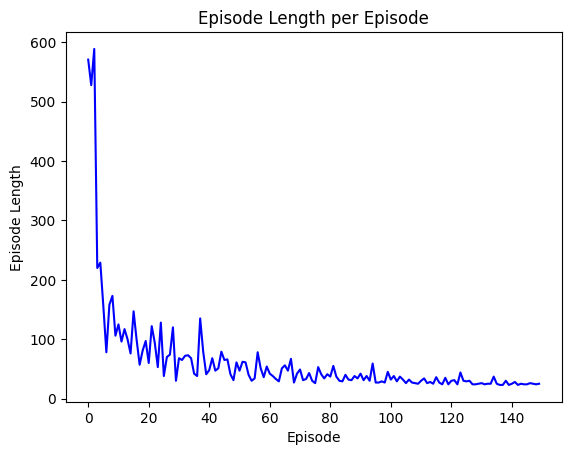

In [6]:
# code source from https://3months.tistory.com/173

import os
import datetime
import numpy as np
import matplotlib.pyplot as plt

discount = 0.99
alpha = 0.5
num_episodes = 150
reward_list = [] #  Total reward per episode
episode_length_list = [] # Total steps per episode
X_size = 10
Y_size = 10

env = TwoDimArrayMap(X_size, Y_size, 4)
env.SimpleAntMazation()

# Q Table reset
Q = # np.zeros([env.observation_space_dim, env.action_space_dim])
V = # np.zeros(env.observation_space_dim)

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    episode_length = 0
    while not done:
        action = # np.argmax(Q[state, :] + np.random.randn(1, env.action_space_dim) / (episode + 1))  # E-greedy with decaying randomness. The 1 of np.random.randn(1, env.action_space_dim) means that the number of samples is 1.

        # new_state, reward, done = env.step(action)

        Q[state, action] = # Q[state, action] + alpha * (reward + discount * np.max(Q[new_state, :]) - Q[state, action])
        V[state] = # np.max(Q[state, :])

        total_reward += reward
        state = new_state
        episode_length += 1
    reward_list.append(total_reward)    # It should be just "1"
    episode_length_list.append(episode_length)

OneLineToCell_V = OneLineToCell(X_size, Y_size)
V_table = OneLineToCell_V.FillGridByOneLineArray(V)

plt.plot(range(len(episode_length_list)), episode_length_list, color="blue")
plt.title("Episode Length per Episode")
plt.xlabel("Episode")
plt.ylabel("Episode Length")

now = datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
path = f'./results/result_{now}'
if not os.path.isdir(path):
    os.makedirs(path)
plt.savefig(f'{path}/episode_length.png')
np.savetxt(f'{path}/SimpleMaze_table.txt', env.maze, fmt='%d')
np.savetxt(f'{path}/V_table.txt', V_table, fmt='%.3f')